# **Temperature Prediction In Subang jaya**
## Data Pre-processing

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sbn

### Import the dataset

In [2]:
data_dir_1 = "2001-2024.csv"
weather = pd.read_csv(data_dir_1)

In [3]:
print(weather)

            Date  Temp_max(c)  Temp_avg(c)  Temp_min(c)  Dew_max(c)  \
0      1/01/2001         32.8         28.7         25.0        23.9   
1      2/01/2001         31.1         24.8        -17.8        25.0   
2      3/01/2001         30.0         26.8         25.0        25.0   
3      4/01/2001         28.9         26.0         22.8        23.9   
4      5/01/2001         32.2         27.3         23.9        23.9   
...          ...          ...          ...          ...         ...   
8242  26/05/2024         35.0         28.7         26.1        26.1   
8243  27/05/2024         33.9         28.5         26.1        27.2   
8244  28/05/2024         33.9         29.7         26.1        27.2   
8245  29/05/2024         36.1         30.0         27.2        26.1   
8246  30/05/2024         33.9         28.5         26.1        27.2   

      Dew_avg(c)  Dew_min(c)  Hum_max(%)  Hum_avg(%)  Hum_min(%)  \
0           23.4        22.8          94        74.5          55   
1          

### Check for missing values

In [4]:
print(weather.isna().sum())

Date             0
Temp_max(c)      0
Temp_avg(c)      0
Temp_min(c)      0
Dew_max(c)       0
Dew_avg(c)       0
Dew_min(c)       0
Hum_max(%)       0
Hum_avg(%)       0
Hum_min(%)       0
Wind_max(mph)    0
Wind_avg(mph)    0
Wind_min(mph)    0
Pres_max(in)     0
Pres_avg(in)     0
Pres_min(in)     0
Precipitation    0
dtype: int64


In [5]:
weather.shape

(8247, 17)

### Dropping unnecesary features

In [6]:
weather_df = weather.drop('Date', axis=1)

In [7]:
print(weather_df.isna().sum())

Temp_max(c)      0
Temp_avg(c)      0
Temp_min(c)      0
Dew_max(c)       0
Dew_avg(c)       0
Dew_min(c)       0
Hum_max(%)       0
Hum_avg(%)       0
Hum_min(%)       0
Wind_max(mph)    0
Wind_avg(mph)    0
Wind_min(mph)    0
Pres_max(in)     0
Pres_avg(in)     0
Pres_min(in)     0
Precipitation    0
dtype: int64


### Check for any outliers

<Axes: >

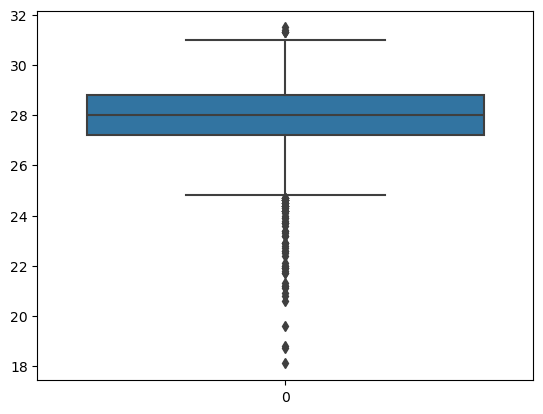

In [8]:
sbn.boxplot(weather_df['Temp_avg(c)'])

IQR: 1.60
Lower_Fence: 24.80
Upper_Fence: 31.20

Display Outliers
      Temp_max(c)  Temp_avg(c)  Temp_min(c)  Dew_max(c)  Dew_avg(c)  \
10           31.1         24.2        -17.8        22.8        20.5   
13           32.2         21.2        -17.8        23.9        17.4   
36           32.2         22.6        -17.8        23.9        19.4   
62           35.0         23.3        -17.8        25.0        18.9   
600          32.8         23.9        -17.8        25.0        21.6   
...           ...          ...          ...         ...         ...   
7003         25.0         23.7         22.8        23.9        22.6   
7352         25.0         24.4         23.9        23.9        23.6   
7495         36.1         31.3         27.2        26.1        24.2   
7754         26.1         24.3         22.2        23.9        22.9   
7790         26.1         24.6         23.9        23.9        23.4   

      Dew_min(c)  Hum_max(%)  Hum_avg(%)  Hum_min(%)  Wind_max(mph)  \
10        

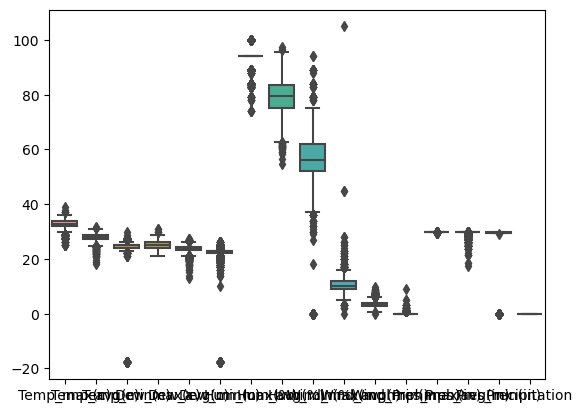

In [9]:
# Display a BoxPlot
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sbn 
sbn.boxplot(weather_df)

# Compute the Interquartile Range (IQR)
Q1 = weather_df['Temp_avg(c)'].quantile(0.25)
Q3 = weather_df['Temp_avg(c)'].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers and Filtering Out the Outliers
print("\nDisplay Outliers")
print (weather_df[((weather_df['Temp_avg(c)'] < Lower_Fence) | (weather_df['Temp_avg(c)'] > Upper_Fence))])

# display data with outliers filtered out, use ~ to filter
print("\nDisplay data without outliers")
print (weather_df[~((weather_df['Temp_avg(c)'] < Lower_Fence) | (weather_df['Temp_avg(c)'] > Upper_Fence))])

### Removing Outliers

In [10]:
weatherRemOut_df = weather_df[~((weather_df['Temp_avg(c)'] < Lower_Fence) | (weather_df['Temp_avg(c)'] > Upper_Fence))]
print(weatherRemOut_df)

      Temp_max(c)  Temp_avg(c)  Temp_min(c)  Dew_max(c)  Dew_avg(c)  \
0            32.8         28.7         25.0        23.9        23.4   
1            31.1         24.8        -17.8        25.0        21.4   
2            30.0         26.8         25.0        25.0        23.9   
3            28.9         26.0         22.8        23.9        23.2   
4            32.2         27.3         23.9        23.9        21.8   
...           ...          ...          ...         ...         ...   
8242         35.0         28.7         26.1        26.1        25.3   
8243         33.9         28.5         26.1        27.2        25.7   
8244         33.9         29.7         26.1        27.2        26.0   
8245         36.1         30.0         27.2        26.1        25.5   
8246         33.9         28.5         26.1        27.2        25.9   

      Dew_min(c)  Hum_max(%)  Hum_avg(%)  Hum_min(%)  Wind_max(mph)  \
0           22.8          94        74.5          55              8   
1    

### Shuffling data

In [11]:
from sklearn.utils import shuffle

# Shuffle the data to avoid biasness

df_shuffled = shuffle(weatherRemOut_df, random_state=42)

In [12]:
from sklearn.preprocessing import RobustScaler

# Initialize StandardScaler
scaler = RobustScaler()

# Fit the scaler to data and transform
scaled_data = scaler.fit_transform(df_shuffled)

# Covert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns = df_shuffled.columns)
print("\nScaled Data: \n", scaled_df)


Scaled Data: 
       Temp_max(c)  Temp_avg(c)  Temp_min(c)  Dew_max(c)  Dew_avg(c)  \
0        0.000000      -0.3125          0.0         0.0    0.307692   
1       -0.352941      -0.7500         -1.0         0.0   -0.230769   
2        0.647059       0.3125          0.0         0.5    0.769231   
3       -0.352941      -0.4375          0.0        -0.5   -0.538462   
4       -1.000000      -0.3750          0.0         0.5    0.461538   
...           ...          ...          ...         ...         ...   
8164     0.647059       0.3125          1.0         0.5    0.153846   
8165     0.647059       0.6250          0.0        -0.5   -0.538462   
8166     1.294118       0.4375          0.0         0.0    0.000000   
8167    -1.000000      -1.3750         -1.0         0.5    0.230769   
8168    -1.000000      -0.8750         -1.0         0.0   -0.461538   

      Dew_min(c)  Hum_max(%)  Hum_avg(%)  Hum_min(%)  Wind_max(mph)  \
0      -1.000000         0.0    0.402439         0.7       2

In [13]:
# Set the target variable
DV = 'Temp_avg(c)'

# Drop DV so x only have independent variable
x = scaled_df.drop(DV, axis=1)
y = scaled_df[DV]

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print(x_train)

      Temp_max(c)  Temp_min(c)  Dew_max(c)  Dew_avg(c)  Dew_min(c)  \
4960     0.647059          0.0         0.0    0.230769    0.000000   
3443     0.647059          0.0         1.0    1.307692    1.833333   
7387     1.294118          1.0         0.5    0.384615    0.000000   
4898     0.647059          0.0         0.0   -0.153846   -1.000000   
5067     0.647059          0.0         0.0   -0.538462   -1.000000   
...           ...          ...         ...         ...         ...   
5226     0.647059          1.0         0.5    0.461538    0.000000   
5390    -0.352941          0.0         0.5    1.076923    3.666667   
860      0.000000          1.0         0.0    0.076923    0.000000   
7603    -0.352941         -2.0         0.0   -0.692308   -1.000000   
7270     0.647059          2.0         0.0   -0.076923   -2.833333   

      Hum_max(%)  Hum_avg(%)  Hum_min(%)  Wind_max(mph)  Wind_avg(mph)  \
4960         0.0   -0.487805        -0.4      -0.666667      -0.461538   
3443       

## Simple Linear Regression
Using regression in one independent variable

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit model to data only using the humidity column
model.fit (x_train [['Hum_avg(%)']], y_train)

LinearRegression()

### Prediction

In [16]:
# Generate Prediction on Test Data
predictions = model.predict(x_test[['Hum_avg(%)']])

### Plot

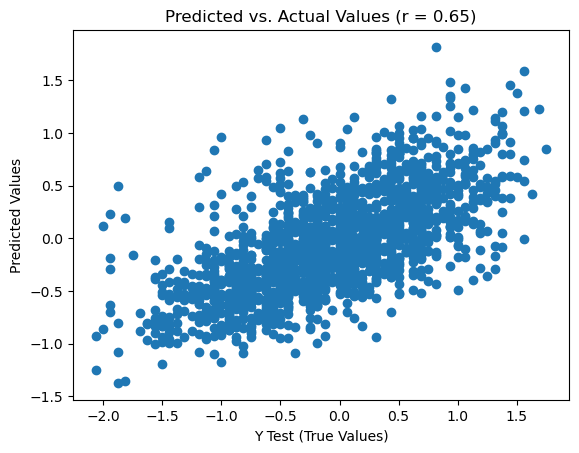

In [17]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter (y_test, predictions)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0], 2))
plt.show()

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


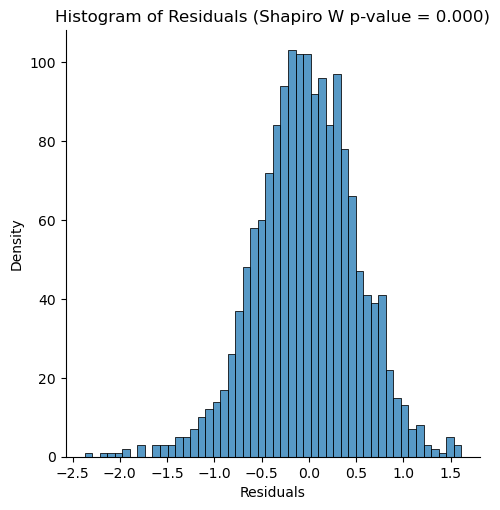

In [18]:
import seaborn as sns
from scipy.stats import shapiro
sns.displot ((y_test - predictions), bins = 50)
plt.xlabel ('Residuals')
plt.ylabel('Density')
plt.title ('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - predictions)[1]))
plt.show()

### Performance Metrics

In [19]:
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, predictions),
metrics.mean_squared_error (y_test, predictions),
np.sqrt (metrics.mean_squared_error (y_test, predictions)),
metrics.explained_variance_score (y_test, predictions)]}).round(3)
print(metrics_df)

      Metric  Value
0        MAE  0.417
1        MSE  0.285
2       RMSE  0.534
3  R-Squared  0.428


## Multiple Linear Regression
Using multiple features as independant variable

In [20]:
# Fit the model with all features of x
model.fit(x_train, y_train)

LinearRegression()

### Prediction

In [21]:
# Generate a prediction based on the training data
predictions = model.predict(x_test) 

### Plot

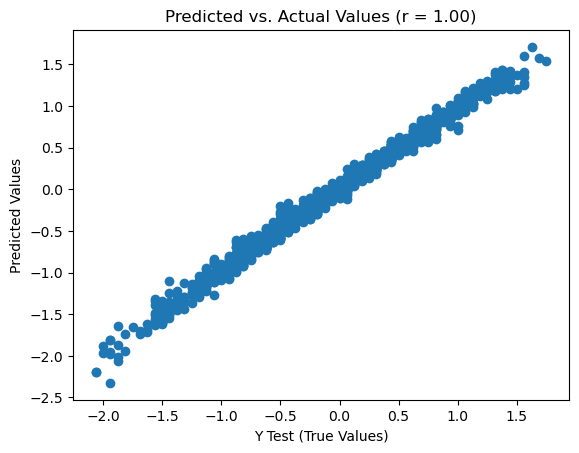

In [22]:
# Creating a Correlation Coefficient and Display on Plot Title
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter (y_test, predictions)
plt.xlabel ('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0], 2))
plt.show()

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


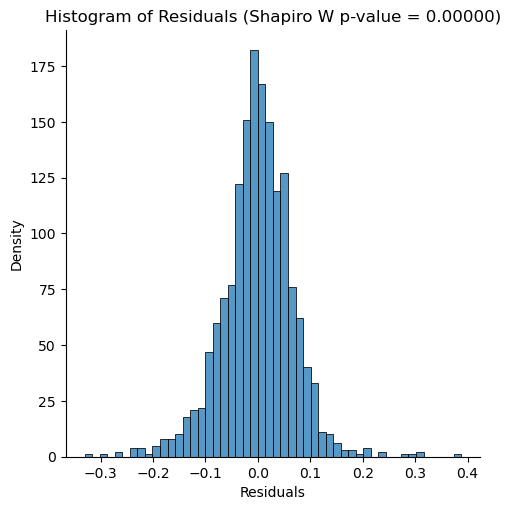

In [23]:
# Create a density plot of the residuals.
import seaborn as sns
from scipy.stats import shapiro
sns.displot ((y_test - predictions), bins = 50)
plt.xlabel ('Residuals')
plt.ylabel('Density')
plt.title ('Histogram of Residuals (Shapiro W p-value = {0:0.5f})'.format(shapiro(y_test -predictions)[1]))
plt.show()

### Performance Metrics

In [24]:
# Performance Metrics
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, predictions),
metrics.mean_squared_error (y_test, predictions),
np.sqrt (metrics.mean_squared_error (y_test, predictions)),
metrics.explained_variance_score (y_test, predictions)]}).round(3)
print(metrics_df)

      Metric  Value
0        MAE  0.050
1        MSE  0.005
2       RMSE  0.068
3  R-Squared  0.991


## Conclusion

Using simple linear regression, it produces a subpar results:

1. MSE = 0.285
2. RMSE = 0.534
3. R-Squared = 0.428

Decent MSE and RMSE is acquired but very low R-Squared of only 42.8% confidence of the outcome. Based on the scatterplot and histogram of residuals, a better result could be achieved if multiple features are used.

When applying multiple linear regression (using all features), the model produces a very good result:

1. MSE = 0.005
2. RMSE = 0.068
3. R-Squared = 0.991

However, this could be the consequence of overfitting or over-processed of the dataframe. Based on the graphs (scatterplot with r=1.00), it is highly likely the case of overfitting. Hence, further testing with other prediction models is required.